In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow

tensorflow.__version__

'2.6.0'

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd

train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/train_0926.csv')
test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/test_0926.csv')

In [10]:
train

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,TotalBsmtSF,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,SsnPorch,ScreenPorch,Fence,MoSold,SaleType,SaleCondition,SalePrice,YearOld
0,0.235294,0.75,0.033420,1.0,1.0,1.0,1.0,1.0,0.0,0.666667,0.250,0.0,0.714286,0.666667,0.500,0.2,0.333333,0.122500,0.666667,1.0,0.4,0.8,0.75,0.25,0.140098,1.00,1.0,1.0,0.259231,0.333333,0.0,2,0.5,0.375,0.333333,0.666667,0.500000,1.000000,0.000000,0.0,0.166667,0.666667,0.50,0.386460,0.6,0.6,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.00,0.090909,1.0,0.8,12.247699,0.940860
1,0.000000,0.75,0.038795,1.0,1.0,1.0,1.0,0.5,0.0,0.833333,0.125,0.0,0.285714,0.555556,0.875,0.2,0.666667,0.000000,0.333333,1.0,0.2,0.8,0.75,1.00,0.206547,1.00,1.0,1.0,0.174830,0.000000,0.5,2,0.0,0.375,0.333333,0.333333,0.333333,1.000000,0.333333,0.6,0.166667,0.666667,0.50,0.324401,0.6,0.6,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.00,0.363636,1.0,0.8,12.109016,0.661290
2,0.235294,0.75,0.046507,1.0,1.0,0.0,1.0,1.0,0.0,0.666667,0.250,0.0,0.714286,0.666667,0.500,0.2,0.333333,0.101250,0.666667,1.0,0.4,0.8,0.75,0.50,0.150573,1.00,1.0,1.0,0.273549,0.333333,0.0,2,0.5,0.375,0.333333,0.666667,0.333333,1.000000,0.333333,0.6,0.166667,0.666667,0.50,0.428773,0.6,0.6,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.00,0.727273,1.0,0.8,12.317171,0.924731
3,0.294118,0.75,0.038561,1.0,1.0,0.0,1.0,0.0,0.0,0.708333,0.250,0.0,0.714286,0.666667,0.500,0.2,0.666667,0.000000,0.333333,1.0,0.0,0.6,1.00,0.25,0.123732,0.75,1.0,1.0,0.260550,0.333333,0.0,1,0.0,0.375,0.333333,0.666667,0.416667,1.000000,0.333333,0.8,0.833333,0.333333,0.75,0.452750,0.6,0.6,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.00,0.090909,1.0,0.0,11.849405,0.311828
4,0.235294,0.75,0.060576,1.0,1.0,0.0,1.0,0.5,0.0,1.000000,0.250,0.0,0.714286,0.777778,0.500,0.2,0.333333,0.218750,0.666667,1.0,0.4,0.8,0.75,0.75,0.187398,1.00,1.0,1.0,0.351168,0.333333,0.0,2,0.5,0.500,0.333333,0.666667,0.583333,1.000000,0.333333,0.6,0.166667,0.666667,0.75,0.589563,0.6,0.6,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.00,1.000000,1.0,0.8,12.429220,0.908602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.75,0.030929,1.0,1.0,1.0,1.0,1.0,0.0,0.583333,0.250,0.0,0.714286,0.555556,0.500,0.2,0.666667,0.000000,0.333333,1.0,0.4,0.8,0.75,0.25,0.155974,1.00,1.0,1.0,0.247362,0.000000,0.0,2,0.5,0.375,0.333333,0.333333,0.416667,1.000000,0.333333,0.6,0.166667,0.666667,0.50,0.324401,0.6,0.6,1.0,0.000000,0.073126,0.000000,0.0,0.0,0.00,0.636364,1.0,0.8,12.072547,0.913978
1456,0.000000,0.75,0.055505,1.0,1.0,1.0,1.0,1.0,0.0,0.541667,0.250,0.0,0.285714,0.555556,0.625,0.2,1.000000,0.074375,0.333333,1.0,0.2,0.8,0.75,0.25,0.252373,0.50,1.0,1.0,0.327619,0.333333,0.0,2,0.0,0.375,0.333333,0.333333,0.416667,0.333333,0.666667,0.6,0.166667,0.333333,0.50,0.352609,0.6,0.6,1.0,0.407235,0.000000,0.000000,0.0,0.0,0.75,0.090909,1.0,0.8,12.254868,0.704301
1457,0.294118,0.75,0.036187,1.0,1.0,1.0,1.0,1.0,0.0,0.708333,0.250,0.0,0.714286,0.666667,1.000,0.2,0.666667,0.000000,1.000000,0.5,0.8,0.6,1.00,0.25,0.188543,1.00,1.0,1.0,0.377920,0.000000,0.0,2,0.0,0.500,0.333333,0.666667,0.583333,1.000000,0.666667,0.8,0.166667,0.666667,0.25,0.177715,0.6,0.6,1.0,0.000000,0.109689,0.000000,0.0,0.0,1.00,0.363636,1.0,0.8,12.493133,0.602151
1458,0.000000,0.75,0.039342,1.0,1.0,1.0,1.0,1.0,0.0,0.416667,0.250,0.0,0.285714,0.444444,0.625,0.6,0.666667,0.000000,0.333333,1.0,0.2,0.6,0.75,0.50,0.176432,0.75,1.0,0.0,0.1401

In [12]:
train.shape

(1460, 58)

In [19]:
X=train.drop(columns=['SalePrice'])
y=train['SalePrice']

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      test_size = 0.2,
                                                      random_state = 2045)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((1168, 57), (292, 57), (1168,), (292,))

In [24]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential(name='Regression')
model.add(layers.Dense(64, activation = 'relu', input_shape = (57,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1))

In [25]:
model.summary()

Model: "Regression"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                3712      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 7,937
Trainable params: 7,937
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss = 'mse',
               optimizer = 'rmsprop',
               metrics = ['mse'])

In [27]:
%%time

Hist_model = model.fit(X_train, y_train,
                       epochs = 500,
                       batch_size = 1,
                       validation_data = (X_valid, y_valid))

Epoch 1/500
1168/1168 [==============================] - 7s 4ms/step - loss: 3.7818 - mse: 3.7818 - val_loss: 0.2521 - val_mse: 0.2521
Epoch 2/500
1168/1168 [==============================] - 4s 3ms/step - loss: 0.3066 - mse: 0.3066 - val_loss: 0.1293 - val_mse: 0.1293
Epoch 3/500
1168/1168 [==============================] - 4s 3ms/step - loss: 0.2505 - mse: 0.2505 - val_loss: 0.1533 - val_mse: 0.1533
Epoch 4/500
1168/1168 [==============================] - 4s 3ms/step - loss: 0.2031 - mse: 0.2031 - val_loss: 0.0953 - val_mse: 0.0953
Epoch 5/500
1168/1168 [==============================] - 4s 3ms/step - loss: 0.1741 - mse: 0.1741 - val_loss: 0.0694 - val_mse: 0.0694
Epoch 6/500
1168/1168 [==============================] - 4s 3ms/step - loss: 0.1573 - mse: 0.1573 - val_loss: 0.4777 - val_mse: 0.4777
Epoch 7/500
1168/1168 [==============================] - 4s 3ms/step - loss: 0.1407 - mse: 0.1407 - val_loss: 0.0614 - val_mse: 0.0614
Epoch 8/500
1168/1168 [==============================] 

In [30]:
test_mse_score, test_mae_score = model.evaluate(X_valid, y_valid)

print('MSE is :',test_mse_score)

10/10 [==============================] - 0s 3ms/step - loss: 0.0366 - mse: 0.0366
MSE is : 0.0365891233086586


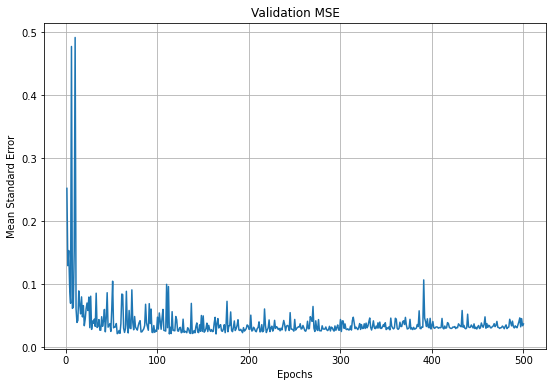

In [32]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_model.history['val_mse']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_model.history['val_mse'])
plt.title('Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Standard Error')
plt.grid()
plt.show()

In [33]:
pred=model.predict(test)

In [34]:
pred

array([[11.775706],
       [11.978094],
       [12.161861],
       ...,
       [12.109492],
       [11.739608],
       [12.417665]], dtype=float32)

In [35]:
import numpy as np
pred = np.expm1(pred)

In [40]:
pred

array([[130053.164],
       [159227.27 ],
       [191349.38 ],
       ...,
       [181586.39 ],
       [125442.13 ],
       [247127.7  ]], dtype=float32)

In [39]:
sub=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/sample_submission.csv')
sub['SalePrice']=pred
sub.to_csv('/content/drive/MyDrive/Colab Notebooks/submission/DNN_1.csv',index=False)

In [36]:
model.save('/content/drive/My Drive/Colab Notebooks/models/house_price_DNN.h5')